# IMPORTARE PACCHETTI QUI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# EXPLORATORY DATA ANALYSIS + VISUALIZATIONS

target: VB (flank wear)
le altre sono cose per predire --> a noi interessa soprattutto vib_spindle

In [ ]:
df = pd.read_csv('mill.csv')
df.head(10)
df = df.drop('Unnamed: 0', axis=1)
df.head(10)

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474
5,1,6,0.20,15,1.5,0.5,1,0.329590,0.683594,0.070801,0.307617,0.103760,0.120239
6,1,7,0.24,19,1.5,0.5,1,-0.578613,1.381836,0.065918,0.322266,0.090942,0.123901
7,1,8,0.29,22,1.5,0.5,1,0.300293,1.435547,0.061035,0.308838,0.092773,0.108643
8,1,9,0.28,26,1.5,0.5,1,-0.305176,1.450195,0.065918,0.284424,0.084229,0.098877
9,1,10,0.29,29,1.5,0.5,1,0.214844,1.406250,0.061035,0.279541,0.087891,0.106812


In [ ]:
unique_values = df['material'].unique()
print("materials")
print(unique_values)
print("feed")
unique_feed = df['feed'].unique()
print(unique_feed)
unique_doc = df['DOC'].unique()
print("DOC")
print(unique_doc)
unique_VB = df['VB'].unique()
print("VB")
print(unique_VB)

materials
[1 2]
feed
[0.5  0.25]
DOC
[1.5  0.75]
VB
[0.    nan 0.11 0.2  0.24 0.29 0.28 0.38 0.4  0.43 0.45 0.5  0.44 0.08
 0.14 0.15 0.18 0.22 0.26 0.31 0.48 0.55 0.13 0.17 0.19 0.23 0.33 0.36
 0.35 0.49 0.1  0.27 0.47 0.64 0.81 0.04 0.16 0.25 0.53 0.7  0.07 0.09
 0.12 0.37 0.42 0.57 0.65 0.68 0.76 0.05 0.32 0.58 0.74 0.34 0.46 0.3
 0.62 0.56 0.83 0.92 1.07 1.3  1.53 0.6  1.14]


In [ ]:
df.describe()

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
count,167.000000,167.000000,146.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000
mean,8.329341,7.167665,0.337603,26.113772,1.032934,0.372754,1.347305,-0.164495,1.336546e+00,7.948459e-02,0.285652,1.004229e-01,0.123872
std,4.764886,4.969367,0.260528,23.292643,0.364616,0.125356,0.477546,0.357721,1.893880e-01,3.654218e-02,0.030758,2.469953e-02,0.021194
min,1.000000,1.000000,0.000000,0.000000,0.750000,0.250000,1.000000,-0.798340,2.084677e-33,1.054677e-08,0.000003,4.074626e-11,0.000003
25%,3.000000,3.000000,0.150000,7.500000,0.750000,0.250000,1.000000,-0.551758,1.350098e+00,6.103516e-02,0.274658,9.277344e-02,0.110474
50%,10.000000,6.000000,0.285000,19.000000,0.750000,0.250000,1.000000,-0.156250,1.372070e+00,6.835938e-02,0.284424,1.019287e-01,0.122070
75%,12.000000,10.000000,0.467500,39.000000,1.500000,0.500000,2.000000,0.206299,1.391602e+00,8.300781e-02,0.297852,1.147461e-01,0.136414
max,16.000000,23.000000,1.530000,105.000000,1.500000,0.500000,2.000000,0.378418,1.450195e+00,2.929688e-01,0.391846,1.495361e-01,0.181274


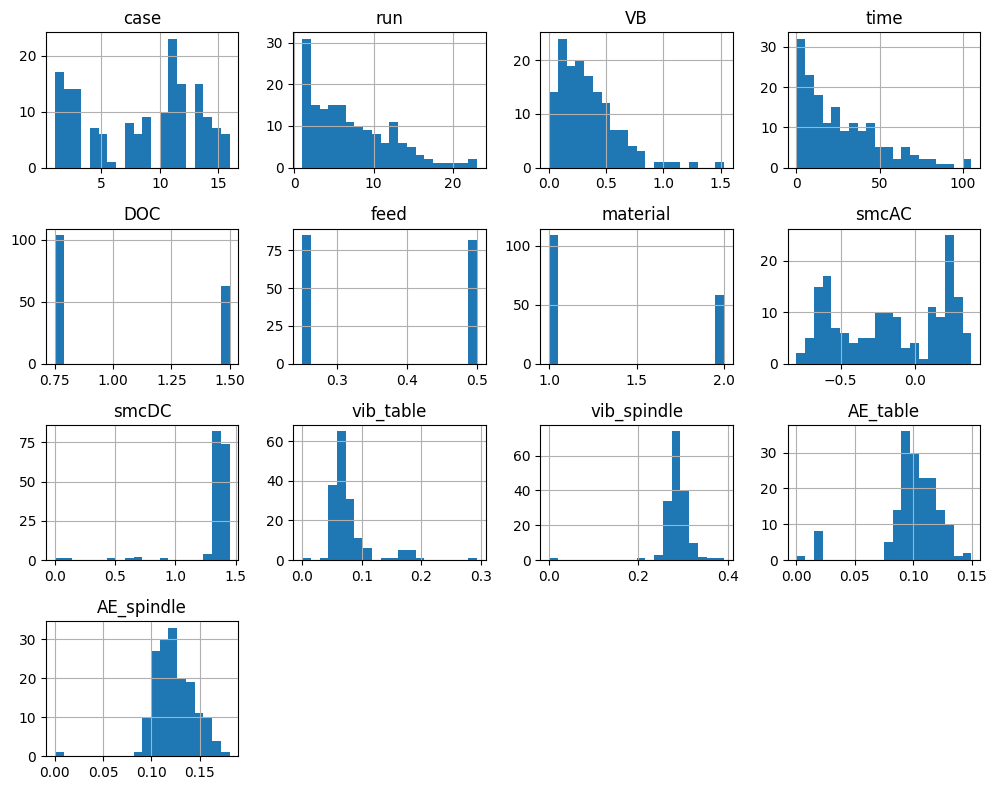

In [ ]:
#plot histograms
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

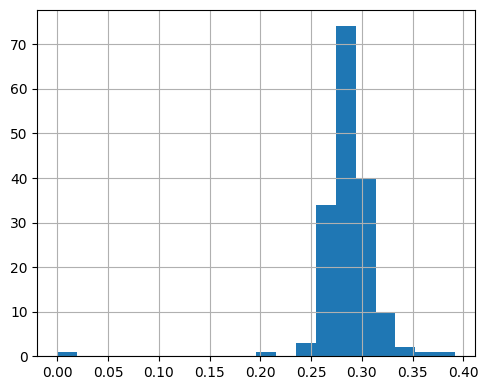

In [ ]:
#spindle vibration, the most important variable for us
df['vib_spindle'].hist(bins=20, figsize=(5, 4))
plt.tight_layout()
plt.show()

In [ ]:
#missing data - there are some missing data in VB (flank wear)
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(100)

,Total,%
VB,21,12.6
case,0,0.0
run,0,0.0
time,0,0.0
DOC,0,0.0
feed,0,0.0
material,0,0.0
smcAC,0,0.0
smcDC,0,0.0
vib_table,0,0.0


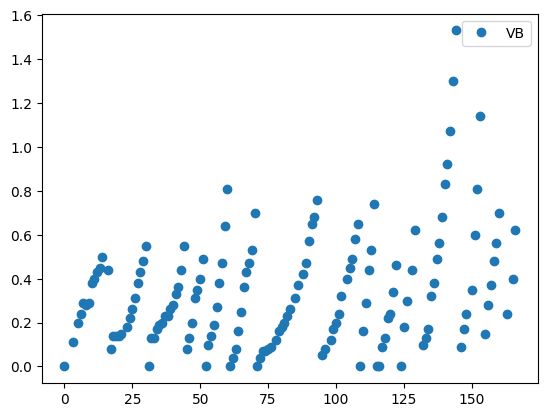

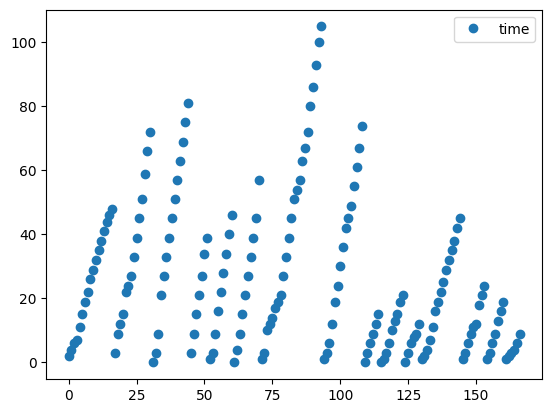

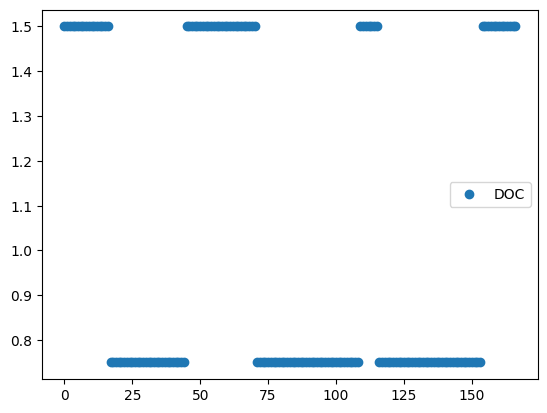

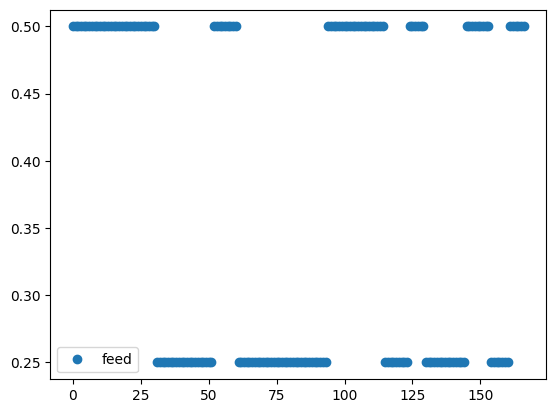

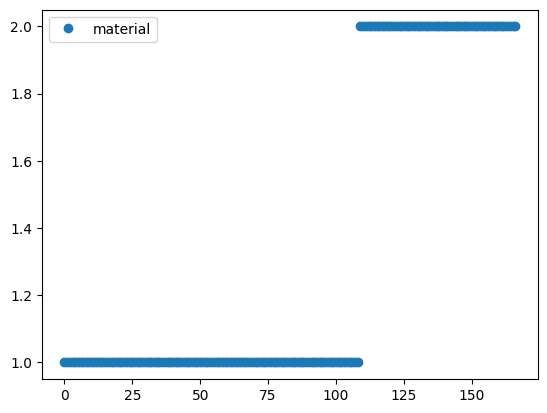

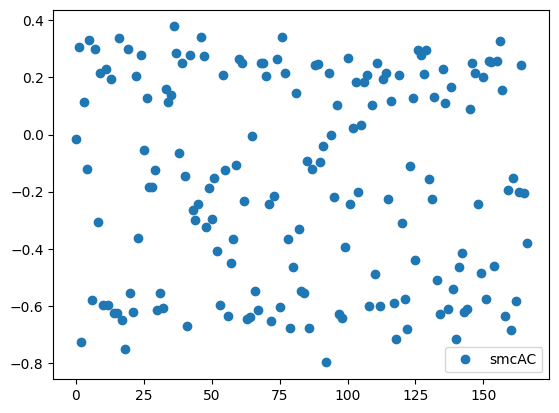

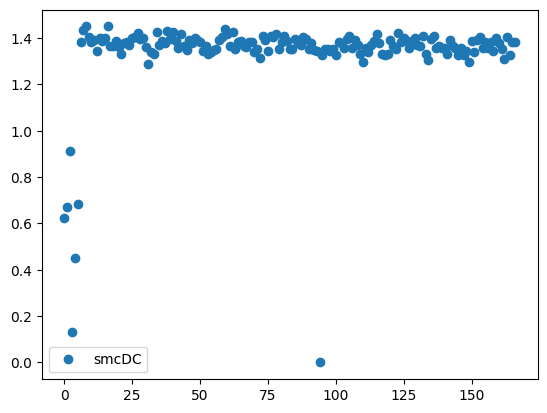

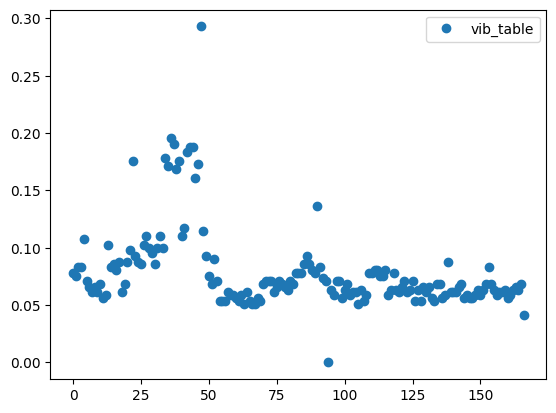

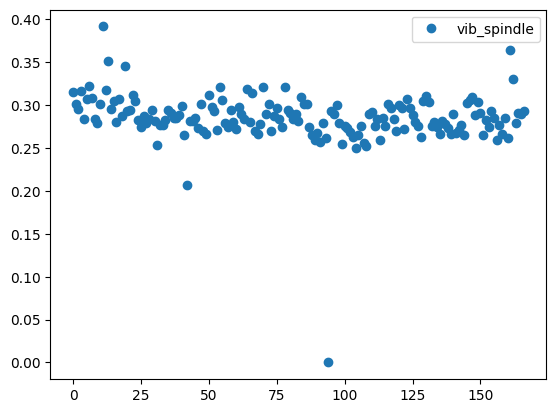

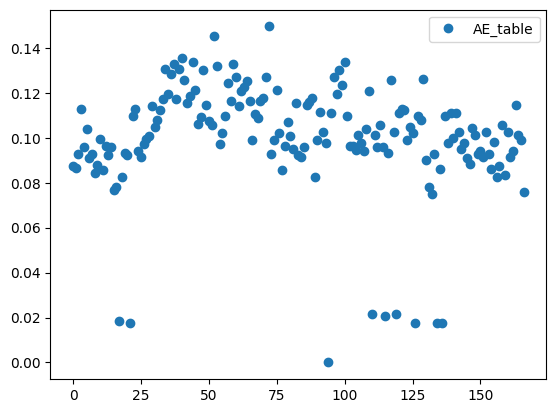

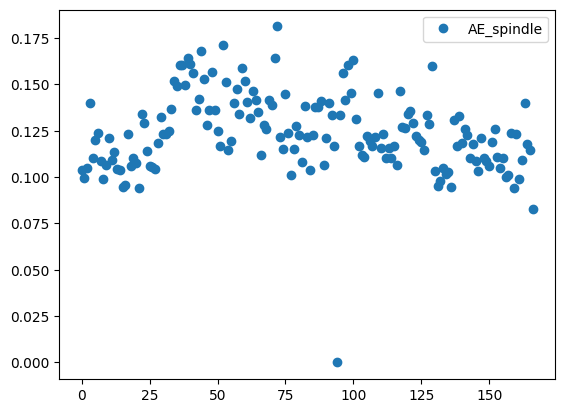

In [ ]:
columns = ['case', 'run', 'VB', 'time', 'smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']
for column in df.columns:
    if column in ['case', 'run']:continue
    plt.plot(df[column].to_numpy(), label=column, marker='o', linestyle='')
    plt.legend()
    plt.show()
    plt.cla()
    plt.clf()
    plt.close()


                 case       run        VB      time       DOC      feed  \
case         1.000000 -0.047886  0.253373 -0.109221 -0.160580 -0.194160   
run         -0.047886  1.000000  0.625733  0.941573 -0.248264 -0.129943   
VB           0.253373  0.625733  1.000000  0.509063 -0.033653 -0.019937   
time        -0.109221  0.941573  0.509063  1.000000 -0.258633 -0.156453   
DOC         -0.160580 -0.248264 -0.033653 -0.258633  1.000000  0.174614   
feed        -0.194160 -0.129943 -0.019937 -0.156453  0.174614  1.000000   
material     0.473620 -0.303920  0.261415 -0.443332 -0.048788 -0.037209   
smcAC       -0.058081 -0.024212 -0.059403  0.007973  0.021207  0.104865   
smcDC        0.162363  0.204143  0.149946  0.206681 -0.148442 -0.198365   
vib_table   -0.477796  0.133830 -0.110606  0.239667 -0.096102 -0.233306   
vib_spindle -0.182004 -0.089062 -0.254839 -0.127997  0.210296  0.087499   
AE_table    -0.029627  0.105327  0.011542  0.184416  0.024933 -0.134397   
AE_spindle  -0.110367  0.

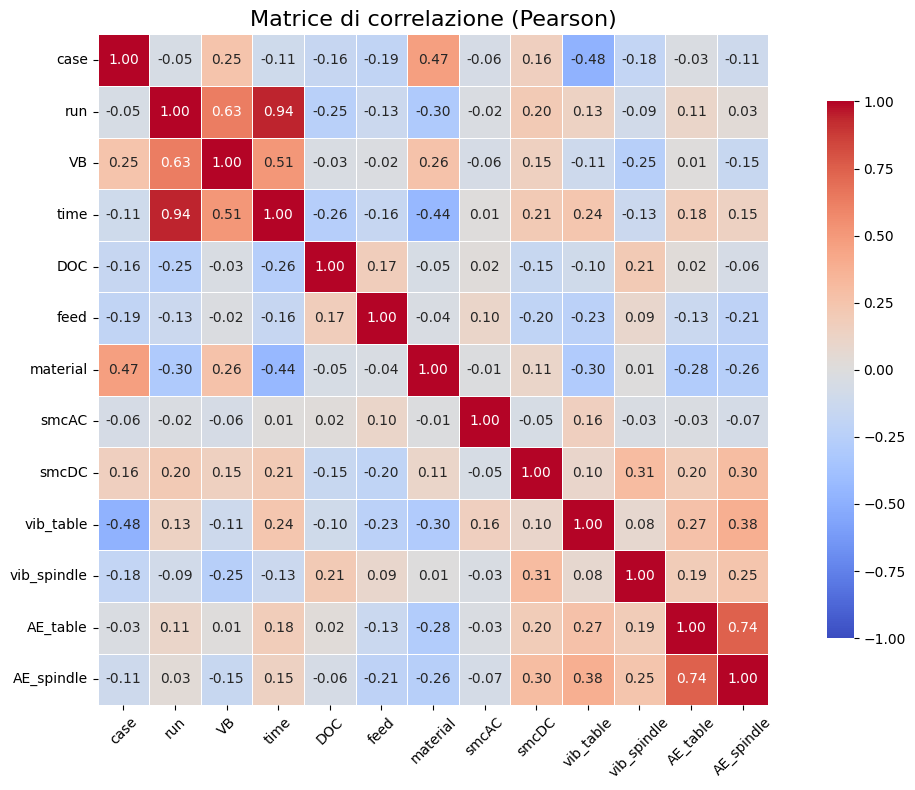

In [ ]:
print(df.corr(method="pearson"))
import matplotlib.pyplot as plt
#correlazione tra time e VB
#correlazione tra vib-spindle e VB ma negativa!


# Calcolo della matrice di correlazione con metodo Pearson
correlation_matrix = df.corr(method="pearson")

# Stampa numerica della matrice
print("\n Matrice di correlazione (Pearson):")
print(correlation_matrix)

# Plot della heatmap con annotazioni e color map visiva
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,                # Valori numerici nelle celle
            fmt=".2f",                 # Due cifre decimali
            cmap="coolwarm",          # Colori da rosso (negativo) a blu (positivo)
            linewidths=0.5,           # Linee sottili tra le celle
            vmin=-1, vmax=1,          # Range standard di correlazione
            square=True,              # Celle quadrate
            cbar_kws={"shrink": 0.8}) # Riduce altezza della color bar

plt.title("Matrice di correlazione (Pearson)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
def find_outliers_iqr(df):
    outlier_summary = []

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        if not outliers.empty:
            summary = {
                "Column": col,
                "N outliers": outliers.shape[0],
                "Outlier values (unique)": sorted(outliers.unique())[:5],  # show only first 5 unique values
                "Indices (sample)": list(outliers.index[:5])  # show only first 5 indices
            }
            outlier_summary.append(summary)

    return pd.DataFrame(outlier_summary)

# Usage
outlier_report = find_outliers_iqr(df)
print(outlier_report.to_string(index=False))


     Column  N outliers                                                                    Outlier values (unique)      Indices (sample)
        run           3                                                                               [21, 22, 23]          [91, 92, 93]
         VB           4                                                                    [1.07, 1.14, 1.3, 1.53]  [142, 143, 144, 153]
       time           3                                                                             [93, 100, 105]          [91, 92, 93]
      smcDC           7                    [2.0846771503879238e-33, 0.1318359375, 0.44921875, 0.625, 0.6689453125]       [0, 1, 2, 3, 4]
  vib_table          16               [1.0546774120712143e-08, 0.1171875, 0.13671875, 0.1611328125, 0.16845703125]  [22, 34, 35, 36, 37]
vib_spindle           6          [2.697645186344744e-06, 0.20751953125, 0.345458984375, 0.3515625, 0.364990234375]  [11, 13, 19, 42, 94]
   AE_table          10 [4.07462640017452

REPORT HTML - DATA VISUALIZATION AND EXPLORATION

In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1e21a2840d27c9d5517997e48fea423444b1372fa9d20d40616b5397cef53863
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
# Generate the profile report
profile = ProfileReport(df, title="YData Profiling Report", explorative=True)
# Save report to HTML file
profile.to_file("profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 80.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]